> GRADED CHALLENGE 2 PHASE 0 WEEK 2

# PERKENALAN
- Belajar menganalisa permasalahan statement yang ingin dibahas.

# LATAR BELAKANG PERMASALAHAN
- Menganalisa sistem pembuangan dan pengelolan sampah di kota Austin

# PROBLEM STATEMENT YANG DIBAHAS
- Mengelola data menggunakan ilmu matematika seperti statistik dan kalkulus, kita dapat memberikan saran ke pemerintah kota Austin sistem apa yang kita tambahkan atau lakukan untuk pembuangan dan pengelolaan sampah pada kota Austin.

# SQL BIGQUERY
- Data yang didapat merupakan data dari Google Cloud Big Query pada tabel "waste_and_diversion" dengan dataset "austin_waste". Query yang digunakan hanya kolom berikut : "report_date", "load_time", "load_type", "load_weight", "dropoff_site" untuk tahun 2021 saja.

> LIBRARY

In [1]:
# Import Library
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Mengecek Sensitive Case
print('Succesed!')

Succesed!


> DATA LOADING

In [2]:
# Load Data
df = pd.read_csv("https://github.com/kevingst8/H8DSFT_GC2/blob/main/waste_diversion.csv?raw=true")

#Menampilkan 5 baris teratas
df.head()

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF


In [3]:
# Menampilkan 5 baris terbawah
df.tail()

,report_date,load_type,load_time,load_weight,dropoff_site
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH
26156,2021-03-01,RECYCLED METAL,2021-03-01 10:22:00.000000 UTC,360.0,AUSTIN IRON AND METAL


In [4]:
# Total jumlah baris dan kolom
df.shape

(26157, 5)

- dataset diatas memiliki 26.157 baris dan 5 kolom

In [5]:
# Menampilkan informasi
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_type     26157 non-null  object 
 2   load_time     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


- Informasi terkait dataset diatas kolom "report_date", "load_type", "load_time" dan "dropoff_site" memiliki 26.157 nilai. Sedangkan pada kolom "load_weight" hanya 25.109 nilai, ini menunjukan terdapat missing value pada kolom.

In [6]:
# Total jumlah baris yang terduplikasi
df.duplicated().value_counts()

False    25712
True       445
dtype: int64

In [7]:
# Menampilkan baris yang terduplikasi
duplicate = df[df.duplicated()]
duplicate.sort_values(by = ["report_date"])

,report_date,load_type,load_time,load_weight,dropoff_site
124,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
125,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
126,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
19133,2021-01-02,SWEEPING,2021-01-02 12:00:00.000000 UTC,NaN,ONION CREEK
19134,2021-01-02,SWEEPING,2021-01-02 12:00:00.000000 UTC,NaN,ONION CREEK
...,...,...,...,...,...
206,2021-07-09,BRUSH,2021-07-09 05:40:00.000000 UTC,5500.0,HORNSBY BEND
148,2021-07-09,SWEEPING,2021-07-09 12:00:00.000000 UTC,NaN,ONION CREEK
47,2021-07-09,SWEEPING,2021-07-09 12:00:00.000000 UTC,NaN,ONION CREEK
109,2021-07-09,SWEEPING,2021-07-09 12:00:00.000000 UTC,NaN,ONION CREEK


- Tabel diatas menunjukan sebanyak 445 baris yang terduplikasi

> DATA CLEANING

In [8]:
# Menyalin dataset
df_copy = df.copy()

# Menghapus baris yang terduplikasi
df_copy = df_copy.drop_duplicates()

# Cek baris jika masih ada yang terduplikasi
df_copy.duplicated().value_counts()

False    25712
dtype: int64

- Baris yang teduplikasi sekarang sudah terhapus. Jumlah keseluruhan baris dataset sekarang adalah 25.712

> IDENTIFIKASI MISSING VALUE

In [9]:
# Indentifikasi kolom yang missing value
df_copy.isnull().sum()

report_date       0
load_type         0
load_time         0
load_weight     629
dropoff_site      0
dtype: int64

- Terdapat 629 baris dari total 25.712 baris atau sekitar 2.45% yang tidak memiliki nilai pada kolom "load_weight"

In [10]:
# Menghapus baris yang memiliki missing value
df_copy.dropna(inplace = True)

In [11]:
# Baris yang sudah dibersihkan dari missing value
df_copy.isnull().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

In [12]:
df_copy.shape

(25083, 5)

- Dataset sekarang sudah tidak memiliki missing value dan siap digunakan. Jumlah baris yang semula 25.712 menjadi 25.083 baris.

> DATA EXPLORATION

In [13]:
# Rentang waktu pengambilan data dengan sort by date
df_copy.sort_values(by = ["report_date"])

,report_date,load_type,load_time,load_weight,dropoff_site
19228,2021-01-02,ORGANICS,2021-01-04 07:04:00.000000 UTC,8460.0,ORGANICS BY GOSH
19161,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:56:00.000000 UTC,17160.0,TDS LANDFILL
19162,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 01:42:00.000000 UTC,15240.0,TDS LANDFILL
19163,2021-01-02,MIXED LITTER,2021-01-02 08:47:00.000000 UTC,4540.0,TDS LANDFILL
19164,2021-01-02,MIXED LITTER,2021-01-02 11:34:00.000000 UTC,6620.0,TDS LANDFILL
...,...,...,...,...,...
211,2021-07-09,BRUSH,2021-07-09 06:00:00.000000 UTC,5500.0,HORNSBY BEND
207,2021-07-09,BRUSH,2021-07-09 02:57:00.000000 UTC,5500.0,HORNSBY BEND
208,2021-07-09,BRUSH,2021-07-09 03:45:00.000000 UTC,5500.0,HORNSBY BEND
210,2021-07-09,BRUSH,2021-07-09 01:12:00.000000 UTC,7000.0,HORNSBY BEND


In [14]:
# Menampilkan tanggal pertama kali pencatatan data
df_copy["report_date"].min()

'2021-01-02'

In [15]:
# Menampilkan tanggal terakhir kali pencatatan data
df_copy["report_date"].max()

'2021-07-09'

- Rentang waktu pengambilan data yaitu "2021-01-01 s/d 2021-07-09".

> JENIS MUATAN SAMPAH YANG ADA DI KOTA AUSTIN

In [16]:
# Menampilkan jenis sampah (load_type)
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

- Jenis muatan sampah di kota Austin : GARBAGE COLLECTIONS, RECYCLING - SINGLE STREAM, ORGANICS, BULK, BRUSH, SWEEPING, MIXED LITTER, TIRES, DEAD ANIMAL, YARD TRIMMING, RECYCLED METAL, LITTER, CONTAMINATED RECYCLING, CONTAMINATED ORGANICS.

> LOKASI TEMPAT PEMBUANGAN SAMPAH DI KOTA AUSTIN

In [17]:
# Menampilkan lokasi tempat pembuangan (dropoff_site)
df_copy["dropoff_site"].value_counts()

TDS LANDFILL             10684
ORGANICS BY GOSH          5732
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1648
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

- Lokasi tempat pembuangan sampah di kota Austin : TDS LANDFILL, ORGANICS BY GOSH, BALCONES RECYCLING, TDS - MRF, HORNSBY BEND, MRF, AUSTIN IRON AND METAL, ON ROUTE HIGH DUMP, GREAT NORTHERN, PARK BEND, AUSTIN WOOD RECYCLING, BALCONES WOODS, STEINER LANDFILL, WESTFIELD.

> CENTRAL TENDENCY

In [18]:
# Mencari mean
df_copy.groupby(by = "dropoff_site", sort = True)["load_weight"].apply(pd.Series.mean).to_frame()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,451.200000
AUSTIN WOOD RECYCLING,4050.000000
BALCONES RECYCLING,9464.934760
BALCONES WOODS,8460.000000
GREAT NORTHERN,19153.333333
HORNSBY BEND,6636.638350
MRF,1799.982143
ON ROUTE HIGH DUMP,12525.714286
ORGANICS BY GOSH,11824.135729


- Tabel menampilkan nila rata-rata (mean) berat muatan pada masing-masing tempat pembuangan. Sebagai contoh ditempat pembuangan "AUSTIN IRON AND METAL" memiliki rata-rata berat muatan sebesar 451.2kg.

In [19]:
# Mencari median
df_copy.groupby(by = "dropoff_site", sort = True)["load_weight"].apply(pd.Series.median).to_frame()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,21110.0
HORNSBY BEND,6400.0
MRF,1360.0
ON ROUTE HIGH DUMP,14940.0
ORGANICS BY GOSH,11920.0


- Tabel menampilkan nilai tengah (median) berat muatan pada masing-masing tempat pembuangan. Sebagai contoh ditempat pembuangan "AUSTIN IRON AND METAL" memiliki nilai tengah dengan berat muatan sebesar 400kg.

In [20]:
# Mencari modus
df_copy.groupby(by = "dropoff_site", sort = True)["load_weight"].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                        
AUSTIN IRON AND METAL 0        260.0
                      1        320.0
                      2        520.0
AUSTIN WOOD RECYCLING 0       2340.0
                      1       5760.0
BALCONES RECYCLING    0      11880.0
BALCONES WOODS        0       8460.0
GREAT NORTHERN        0       8700.0
                      1      17160.0
                      2      20900.0
                      3      21320.0
                      4      21960.0
                      5      24880.0
HORNSBY BEND          0       5500.0
MRF                   0        960.0
ON ROUTE HIGH DUMP    0       4060.0
                      1       7480.0
                      2      12500.0
                      3      14940.0
                      4      15040.0
                      5      15200.0
                      6      18460.0
ORGANICS BY GOSH      0      14580.0
PARK BEND             0       8480.0
                      1       8960.0
                      2      15700.0
                      3      20400.0
STEINER LANDFILL      0        780.0
TDS - MRF             0      10360.0
TDS LANDFILL          0         20.0
                      1         60.0
                      2      12020.0
WESTFIELD             0      16020.0

- Tabel diatas menampilkan nilai yang paling sering muncul (modus) berat muatan di masing-masing tempat pembuangan. Sebagai contoh pada tempat pembuangan "AUSTIN IRON AND METAL" memiliki 3 nilai berat muatan yang paling sering muncul sebesar 260kg, 320kg dan 520kg.

> TEMPAT PEMBUANGAN YANG DIAMATI

In [21]:
# Jenis sampah yang dibuang
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

- Terdapat jenis sampah yaitu "ORGANICS" sebanyak 5.740 jenis, yang artinya sampah tersebut adalah limbah organik. Limbah organik adalah sisa bahan atau sampah yang dapat didaur ulang dan berasal dari makhluk hidup, selanjutnya dapat diamati jenis limbah organik dapat dibuang ke tempat pembuangan mana saja.

In [22]:
# Lokasi tempat pembuangan jenis sampah organics
organics = df_copy.loc[df_copy['load_type'] == 'ORGANICS']
organics["dropoff_site"].value_counts()

ORGANICS BY GOSH      5705
TDS LANDFILL            22
ON ROUTE HIGH DUMP       7
PARK BEND                4
HORNSBY BEND             2
Name: dropoff_site, dtype: int64

In [23]:
# Jumlah berat muatan masing-masing lokasi tempat pembuangan
sum_organics = organics.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum()
sum_organics

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67671006.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

- Limbah organik paling banyak dibuang ke tempat pembuangan "ORGANICS BY GOSH" dan berat limbah organik yang dibuang mencapai 67.671.006kg.

In [24]:
# Memfilter tempat pembuangan organics by gosh
organics_by_gosh = organics.loc[df['dropoff_site'] == 'ORGANICS BY GOSH']
organics_by_gosh

,report_date,load_type,load_time,load_weight,dropoff_site
775,2021-02-21,ORGANICS,2021-02-21 10:41:00.000000 UTC,2480.0,ORGANICS BY GOSH
776,2021-03-14,ORGANICS,2021-03-14 01:37:00.000000 UTC,21700.0,ORGANICS BY GOSH
777,2021-03-21,ORGANICS,2021-03-21 07:56:00.000000 UTC,7120.0,ORGANICS BY GOSH
778,2021-02-21,ORGANICS,2021-02-21 11:07:00.000000 UTC,5560.0,ORGANICS BY GOSH
779,2021-03-14,ORGANICS,2021-03-14 03:04:00.000000 UTC,20460.0,ORGANICS BY GOSH
...,...,...,...,...,...
26151,2021-03-01,ORGANICS,2021-03-01 11:19:00.000000 UTC,18580.0,ORGANICS BY GOSH
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH


In [25]:
# Jumlah data limbah pembuangan organics by gosh
organics_by_gosh_value = organics.loc[df['dropoff_site'] == 'ORGANICS BY GOSH'].value_counts().sum()
organics_by_gosh_value

5705

- Terdapat 5.705 limbah organik yang dibuang ke tempat pembuangan "ORGANICS BY GOSH".

In [26]:
# Jumlah data jenis limbah organics
organics_value = organics.value_counts().sum()
organics_value

5740

- Terdapat 5.740 jenis limbah sampah organics.

In [27]:
# Persentase limbah ditempat pembuangan organics by gosh
perc = organics_by_gosh_value/ organics_value * 100
print(perc, "%")

99.39024390243902 %


- Didapatkan 99,39% limbah organik pada tempat pembuangan "ORGANICS BY GOSH"

> DISTRIBUSI DATA

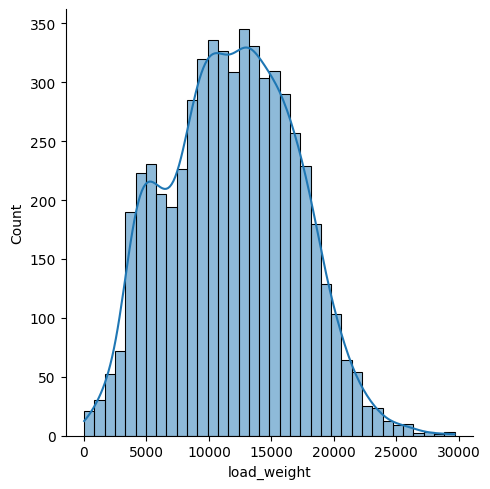

In [28]:
# Membuat Histogram
sns.displot(organics_by_gosh.load_weight, kde = True)

- Setelah melihat bentuk histogram dapat dilakukan perhitungan kemiringan (skew) dengan cara berikut :

In [29]:
# Menghitung kemiringan (skew)
organics_by_gosh['load_weight'].skew()

0.07617790250092829

- Didapat nilai kemiringan sebesar 0,07. Karena kemiringannya mendekati angka 0 maka bisa dikatakan datanya terdistribusi normal dan kemiringannya simetris. Selanjutnya dilakukan pengecekan outlier.

> MENDETEKSI OUTLIER

<Axes: ylabel='load_weight'>

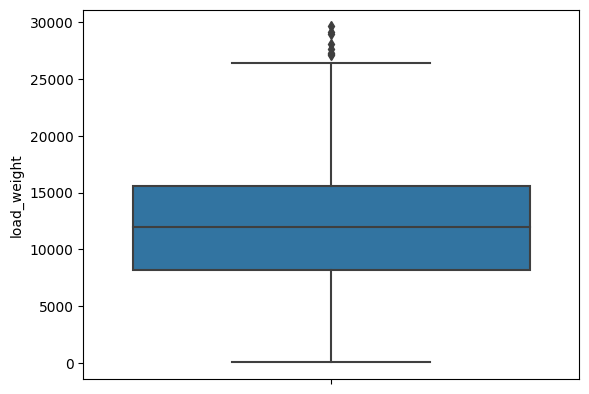

In [30]:
# Membuat boxplot menggunakan seaborn
sns.boxplot(data = organics_by_gosh, y = 'load_weight')

- Dari gambar diatas terdapat beberapa titik diatas yang menunjukkan adanya outlier. Metode yang digunakan untuk mendeteksi outlier adalah z-score rule karena datanya terdistribusi normal. Langkah selanjutnya dapat mencari central tendency kolom "load_weight" dengan tempat pembuangan **ORGANIC BY GOSH**.

> CENTRAL TENDENCY DENGAN ADANYA OUTLIER

In [31]:
# Mean dengan adanya outlier
organics_by_gosh_mean = organics_by_gosh['load_weight'].mean()
organics_by_gosh_mean

11861.701314636284

- Nilai rata-rata berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar 11.824,14 kg.

In [32]:
#cari mean karena datanya terdistribusi normal tidak perlu menghitung iqr
organics_by_gosh_median = organics_by_gosh['load_weight'].quantile([.25,.50,.75])
organics_by_gosh_median

0.25     8200.0
0.50    11940.0
0.75    15560.0
Name: load_weight, dtype: float64

- Nilai kuartil 1, kuartil 2 (median) dan nilai kuartil 3 berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar 8.155 kg, 11.920 kg dan 15.545 kg.

In [33]:
# Modus dengan adanya outlier
organics_by_gosh_mode = organics_by_gosh['load_weight'].mode()
organics_by_gosh_mode

0    14580.0
Name: load_weight, dtype: float64

- Nilai modus berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar 14.580 kg.

> MEASURE OF VARIANCE

- Range

In [34]:
# Menentukan range diperlukan nilai min dan
organic_range_min = organics_by_gosh["load_weight"].min()
organic_range_max = organics_by_gosh["load_weight"].max()

In [35]:
# Range = max - min
organic_range = organic_range_max - organic_range_min
organic_range

29640.0

- Didapatkan nilai rentang (range) berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar 29.640 kg.

> VARIANCE

In [37]:
# Menghitung variance
organics_by_gosh['load_weight'].var()

25350749.50123425

- Didapat nilai variance 25.350.749,5 yang menunjukkan sebaran data sangat besar dari nilai rata-ratanya.

> STANDART DEVIASI

In [38]:
# Menghitung standar deviasi
organics_by_gosh_std = organics_by_gosh['load_weight'].std()
organics_by_gosh_std

5034.952780437395

- Didapatkan nilai standar deviasi 5.034,95 yang menunjukkan sebaran data sangat besar dari nilai rata-ratanya.

> MENENTUKAN UPPER LIMIT DAN LOWER LIMIT

- Rumus untuk menentukan rentang upper limit outlier dan lower limit outlier
```
Outliers = mean +/-3 * std
```

In [40]:
# Menentukan upper limit
outliers_plus = organics_by_gosh_mean + 3*organics_by_gosh_std
outliers_plus

26966.55965594847

- Didapatkan upper limit berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar 26,966,55 kg.

In [42]:
# Melebihi upper limit
organics_by_gosh.loc[organics_by_gosh['load_weight'] > outliers_plus]

,report_date,load_type,load_time,load_weight,dropoff_site
3443,2021-03-15,ORGANICS,2021-03-15 12:00:00.000000 UTC,27240.0,ORGANICS BY GOSH
14594,2021-06-02,ORGANICS,2021-06-02 05:39:00.000000 UTC,28120.0,ORGANICS BY GOSH
14759,2021-06-03,ORGANICS,2021-06-03 07:05:00.000000 UTC,29660.0,ORGANICS BY GOSH
15165,2021-06-07,ORGANICS,2021-06-07 12:00:00.000000 UTC,29000.0,ORGANICS BY GOSH
16120,2021-06-14,ORGANICS,2021-06-14 06:15:00.000000 UTC,29160.0,ORGANICS BY GOSH
16299,2021-06-15,ORGANICS,2021-06-15 02:07:00.000000 UTC,27120.0,ORGANICS BY GOSH
25825,2021-02-26,ORGANICS,2021-02-26 05:12:00.000000 UTC,27620.0,ORGANICS BY GOSH
26116,2021-03-01,ORGANICS,2021-03-01 05:36:00.000000 UTC,27300.0,ORGANICS BY GOSH


- Terdapat 8 outlier yang melebihi upper limit. Selanjutnya dengan cara yang sama dapat mencari outlier yang melebihi lower limit.

In [43]:
# Menentukan lower limit
outliers_minus = organics_by_gosh_mean - 3*organics_by_gosh_std
outliers_minus

-3243.157026675901

- Didapatkan lower limit berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** sebesar -3.243,16 kg. Selanjutnya menampilkan data mana saja termasuk outlier yang melebihi lower limit.

In [45]:
# Melebihi lower limit
organics_by_gosh.loc[organics_by_gosh['load_weight'] < outliers_minus]

,report_date,load_type,load_time,load_weight,dropoff_site


- Tidak terdapat outlier yang melebihi lower limit.

- Didapatkan batas bawah berat limbah organik yang dibuang ke tempat pembuangan ORGANICS BY GOSH sebesar -3.243,16 kg dan batas atas sebesar 26.966.,55 kg.

> PERSENTASE OUTLIER

In [46]:
# Jumlah outlier
organics_by_gosh_outliers_percent = organics_by_gosh.loc[organics_by_gosh['load_weight'] > outliers_plus].value_counts().sum()
organics_by_gosh_outliers_percent

8

In [47]:
# Jumlah outlier / jumlah sampel
organics_by_gosh_o_total = organics_by_gosh_outliers_percent/organics_by_gosh_value * 100
print(organics_by_gosh_o_total, '%')

0.14022787028921999 %


- Didapatkan 0,14 % berat muatan termasuk outlier. Karena persentase outlier nya hanya 0,14 % maka outlier tersebut dapat dihilangkan.

> MENGHILANGKAN OUTLIER

In [48]:
#drop index yang termasuk outlier
organics_by_gosh.drop(index = [3443,14594,14759,15165,16120,16299,25825,26116], inplace=True)

<ipython-input-48-d92922e10696>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organics_by_gosh.drop(index = [3443,14594,14759,15165,16120,16299,25825,26116], inplace=True)


In [49]:
# Menghitung jumlah sampel setelah outlier dihilangkan
organics_by_gosh.count()

report_date     5697
load_type       5697
load_time       5697
load_weight     5697
dropoff_site    5697
dtype: int64

- Setelah outlier dihilangkan jumlah baris yang semula 5.705 sekarang menjadi 5.697. Selanjutnya membuat visualisasi dalam bentuk boxplot.

<Axes: ylabel='load_weight'>

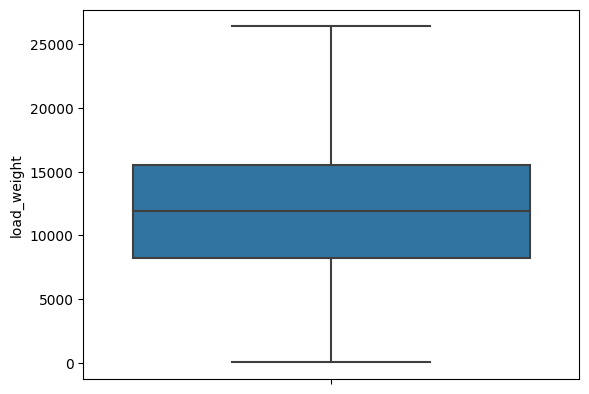

In [50]:
# Boxplot setelah outlier dihapus
sns.boxplot(data=organics_by_gosh, y = 'load_weight')

- Dari gambar diatas dapat dilihat sudah tidak ada outlier seperti sebelumnya. Selanjutnya membuat visualisasi histogram setelah outlier dihilangkan.

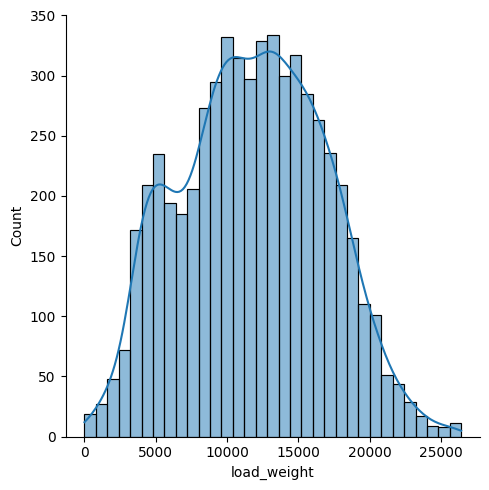

In [51]:
# Membuat Histogram
sns.displot(organics_by_gosh.load_weight, kde = True)

- Dari gambar diatas dapat dilihatkan kalau data terdistribusi normal (Gaussian).

- Selanjutnya dapat dicari kemiringan (skew) dari data yang outliernya telah dihilangkan.

In [52]:
# Menghitung skew / kemiringan
organics_by_gosh['load_weight'].skew()

0.04252980841087013

- Nilai kemiringan (skew) yaitu 0,043 menunjukan kalau kemiringannya simetris.

> CENTRAL TENDENCY TANPA OUTLIER

- Mean

In [53]:
# Menghitung mean
organics_by_gosh['load_weight'].mean()

11838.824995611725

- Nilai mean berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** setelah outlier dihilangkan sebesar 11.838,83 kg.

In [54]:
# Menghitung kuartil
organics_by_gosh['load_weight'].quantile([0.25,0.50,0.75])

0.25     8180.0
0.50    11940.0
0.75    15540.0
Name: load_weight, dtype: float64

- Nilai kuartil 1, kuartil 2 (median) dan kuartil 3 berat limbah organik yang dibuang ke tempat pembuangan ORGANICS BY GOSH setelah outlier dihilangkan sebesar 8.180 kg, 11.940 kg dan 15.540 kg.

- Modus

In [55]:
# Modus
organics_by_gosh.apply(pd.Series.mode)

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-04-01,ORGANICS,2021-03-09 12:00:00.000000 UTC,14580.0,ORGANICS BY GOSH


- Nilai modus berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** setelah outlier dihilangkan sebesar 14.580 kg.

> INFORMATION

- Pemerintah kota Austin berencana membangun tempat pembuangan sampah baru. Beliau meminta analisa dan saran dari kita terkait kapasitas penampungan di tempat pembuangan sampah yang baru berdasarkan perhitungan confidence interval. Berdasarkan pengamatan yang telah dilakukan sebelumnya tentang jenis sampah limbah organis, diasumsikan pemerintah akan membangun tempat pembuangan baru untuk jenis sampah limbah organis. Langkah selanjutnya dapat mencari nilai confidence interval.

> CONFIDENCE INTERVAL

In [56]:
# Daily input total dalam per-hari
daily_input = organics_by_gosh.groupby(by="report_date",sort=True)["load_weight"].apply(pd.Series.sum).to_frame()

In [57]:
# Asumsi nilai confidence level 0.90
confidence_interval = stats.norm.interval(0.90, daily_input.load_weight.mean(), daily_input.load_weight.std())
confidence_interval

(32949.70342951937, 872362.8603288697)

- Didapatkan confidence interval berat limbah organik yang dibuang ke tempat pembuangan **ORGANICS BY GOSH** dalam rentang waktu 2021-01-02 hingga 2021-07-08. Artinya jika Pemerintah Kota Austin ingin membangun tempah pembuangan untuk jenis sampah limbah organis harus memiliki kapasitas tampung antara 32.949 kg - 872.363 kg agar efisien.

> HYPOTHESIS TESTING

In [58]:
# Jenis sampah atau limbah yang dimuat
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

- Dapat dilihat terdapat jenis limbah **RECYCLING - SINGLE STREAM** yang menunjukan jenis limbah yang dapat di daur ulang dan jenis limbah organis. Sebelum melakukan uji hipotesis dilakukan perhitungan rata-rata berat muatan per hari untuk jenis limbah daur ulang dan limbah organis.

In [60]:
# Rata-rata load_weight per hari
daily_recycling = df_copy[df_copy['load_type']=='RECYCLING - SINGLE STREAM'][['report_date','load_weight']].groupby('report_date').sum()
daily_organics = df_copy[df_copy['load_type']=='ORGANICS'][['report_date','load_weight']].groupby('report_date').sum()

print('Average load weight of recycling load type a day: {} kg'.format(np.round(daily_recycling.load_weight.mean())))
print('Average load weight of organic load type a day: {} kg'.format(np.round(daily_organics.load_weight.mean())))

Average load weight of recycling load type a day: 491651.0 kg
Average load weight of organic load type a day: 452376.0 kg


- Rata-rata muatan jenis limbah daur ulang per hari sebesar 491.651 kg dan rata-rata muatan untuk jenis limbah organis per hari sebesar 452.376 kg

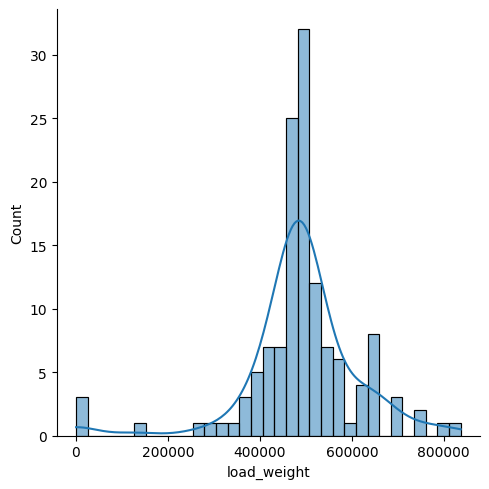

In [61]:
# Visualisasi dalam bentuk histogram
sns.displot(daily_recycling.load_weight, kde = True)

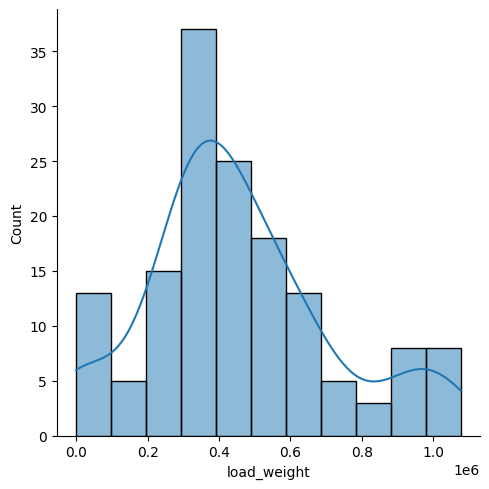

In [62]:
sns.displot(daily_organics.load_weight, kde = True)

- Dari 2 grafik diatas dapat dilihat kalau berat muatan ke 2 jenis limbah terdistribusi normal.
- Asumsi yang digunakan adalah dengan 2 sample 2 tails. Hipotesis yang akan di uji adalah :

1. Hipotesis 0 (Null Hypothesis) : nilai rata-rata berat limbah daur ulang per hari ada perbedaan yang signifikan dengan nilai rata-rata berat limbah organis per hari.

2. Hipotesis 1 (Alternative Hypothesis) : nilai rata-rata berat limbah daur ulang per hari tidak ada perbedaan yang signifikan dengan nilai rata-rata berat limbah organis per hari.

```
H0 : μ RECYCLING - SINGLE STREAM = μ ORGANICS
```



```
H1 : μ RECYCLING - SINGLE STREAM != μ ORGANICS
```

- Uji hipotesis dilakukan untuk mengetahui apakah terdapat perbedaan yang signifikan dari nilai rata-rata berat limbah daur ulang per hari dengan nilai rata-rata berat limbah organis per hari.

> T - TEST

In [63]:
# T-test
t_stat, p_val = stats.ttest_ind(daily_recycling['load_weight'], daily_organics['load_weight'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.11237805370418401
t-statistics: 1.5926006460725861


- Didapat nilai P sebesar 0,11 dimana apabila nilai P > 0,05 menunjukkan gagal tolak H0 atau tidak ada perbedaan yang signifikan nilai rata-rata berat muatan per hari jenis limbah daur ulang dan jenis limbah organis. Untuk lebih jelasnya dapat dilihat dari gambar dibawah ini.

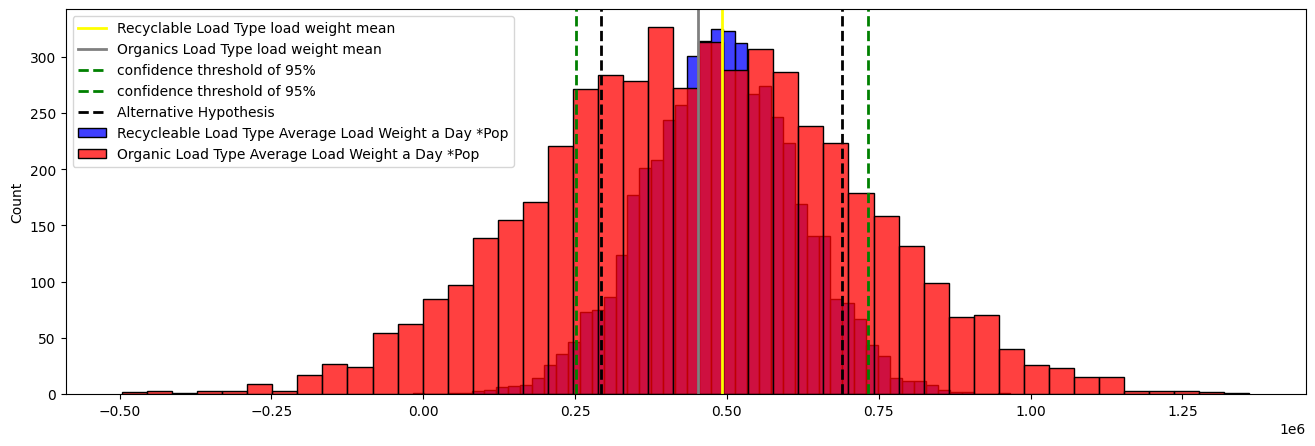

In [65]:
# Simulation
recycling_pop = np.random.normal(daily_recycling['load_weight'].mean(),daily_recycling['load_weight'].std(),5000)
organics_pop = np.random.normal(daily_organics['load_weight'].mean(),daily_organics['load_weight'].std(),5000)

confidence_interval = stats.norm.interval(0.95, daily_recycling['load_weight'].mean(), daily_recycling['load_weight'].std())

plt.figure(figsize=(16,5))

sns.histplot(recycling_pop, label='Recycleable Load Type Average Load Weight a Day *Pop',color='blue')
sns.histplot(organics_pop, label='Organic Load Type Average Load Weight a Day *Pop ',color='red')

plt.axvline(daily_recycling['load_weight'].mean(), color='yellow', linewidth=2, label='Recyclable Load Type load weight mean')
plt.axvline(daily_organics['load_weight'].mean(), color='gray',  linewidth=2, label='Organics Load Type load weight mean')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(recycling_pop.mean()+t_stat*recycling_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(recycling_pop.mean()-t_stat*recycling_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

- Dari gambar diatas, bisa dilihat alternative hypothesis (garis putus-putus hitam) berada didalam rentang confidence interval (garis putus-putus hijau). Sehingga dapat ditarik kesimpulan gagal tolak H0 (null hypothesis) yang berarti tidak ada perbedaan yang signifikan nilai rata-rata berat muatan per hari jenis limbah daur ulang dan jenis limbah organik.

> SARAN

Uji hipotesis yang telah dilakukan dapat menjadi saran untuk pemerintah kota Austin sebagai pertimbangan apabila ingin membangun tempat pembuangan baru untuk jenis sampah yang dapat di daur ulang, dikarenakan nilai rata-rata muatan per hari nya tidak jauh berbeda dengan jenis limbah organik yang sebelumnya sudah direncanakan akan dibuat tempat pembuangan yang baru.

> PROBLEM 1 (stats)

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
- Teknik yang digunakan untuk mengatasi outlier adalah z-score rule dikarenakan datanya terdistribusi normal.

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk pembangunan tempat pembuangan baru?
- Confidence interval digunakan sebagai parameter untuk menentukan keakuratan dari metode pengambilan sampel, Pada kasus pembangunan tempat baru nilai confidence interval didapat dari mean dan standar deviasi data jumlah total berat muatan per hari suatu tempat pembuangan sampah, sehingga didapat rentang confindence interval sebagai acuan untuk menentukan kapasitas tampung sampah.
- Confidence interval juga dapat menjadi sebagai tolak ukur untuk uji hipotesis, apabila alternative hypothesis (H1) berada di luar rentang confidence interval menunjukkan tolak null hypothesis (H0). Sebaliknya apabila nilai H1 berada didalam rentang confidence interval menunjukkan gagal tolak H0.

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
- Uji hipotesi yang diterapkan untuk 2 samples 2 tails. Alasan memilih uji hipotesis tersebut karena ingin melihat apakah ada perbedaan yang signifikan nilai rata-rata berat muatan 2 jenis limbah yang berbeda. Dimana hasil uji hipotesis ini dapat menjadi pertimbangan apabila pemerintah kota Austin akan membangun tempat sampah baru khusus untuk jenis sampah tertentu.

> MATH / CALCULUS

In [66]:
# Groupby
df1 = df_copy.groupby('report_date')['load_weight'].sum().to_frame()
df1

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


- Tabel diatas menujukkan dataset yang sudah dikelompokkan berdasarkan tanggal dan berat muatan

- Selanjutnya melakukan perhitungan v (laju percepatan ) dengan rumus :

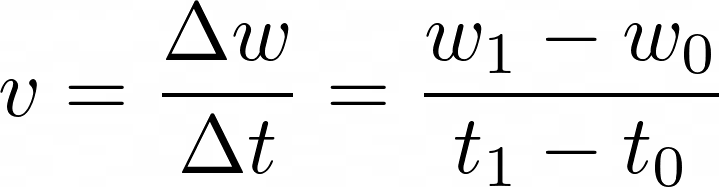

- 1 adalah notasi untuk hari ini (9 Juli 2021) dan 0 adalah notasi untuk hari sebelumnya

In [67]:
v = np.diff(df1['load_weight']) / np.diff(range(len(df1)))

- Setelah mendapatkan laju percepatan selanjutnya dapat dilakukan prediksi berat muatan untuk hari berikutnya dengan menggunakan rumus :

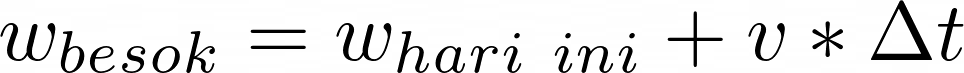

In [68]:
# w Hari ini adalah load_weight 9 juli 2021
# Δt = 1 karena untuk 1 hari ke depan (besok)
# index -1 data paling terakhir
load_weight_tommorow = df1['load_weight'][-1] + v[-1] * 1
abs(load_weight_tommorow) # abs agar nilainya tidak minus

1187970.0

- Didapatkan perkiraan berat muatan sampah dihari esok (10 Juli 2021) sebesar 1.187.970 kg.

> PROBLEM 2 (math)

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
- Pada kasus ini metode yang digunakan adalah numerik yaitu fungsi numpy.diff().

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
- Ya, diperlukan fungsi matematis untuk menghitung turunan. Dari rumus yang diberikan kita dapat menghitung dengan memasukkan nilai (value) dari data yang kita punya. Dengan begitu kita bisa menghitung turunan untuk memperkirakan berat muatan sampah di hari esok.

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
- Perkiraan berat muatan sampah dihari esok (10 Juli 2021) sebesar 1.187.970 kg.

> KESIMPULAN

Dari hasil analisa data diketahui bahwa pengelolaan sampah di kota Austin kurang begitu bagus terutama hal pendistribusian sampah ke lokasi pembuangan. Terdapat beberapa data yang terduplikasi dan data berat muatan yang hilang. Karena distribusi sampah yang kurang merata, kemungkinan akan terjadi penumpukkan sampah di suatu tempat pembuangan yang dapat menimbulkan masalah di masa yang akan datang. Oleh karena itu distribusi sampah harus merata agar dapat dikelola dengan baik dan tidak ada masalah di masa yang akan datang.